# Analise inicial dos dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Dados/covid_airport.csv")
df.head()

,Unnamed: 0,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,0,Daily,2020-03-16,1.0,Boston Logan International,97,POINT(-71.0102909977065 42.3636330376787),Boston,Massachusetts,US-MA,United States of America (the),"POLYGON((-71.0050892829895 42.3472534332511, -..."
1,1,Daily,2020-03-16,1.0,Calgary International,100,POINT(-114.013122872131 51.1184753727795),Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -..."
2,2,Daily,2020-03-16,1.0,Charlotte Douglas International,91,POINT(-80.9478114283204 35.2136892261228),Charlotte,North Carolina,US-NC,United States of America (the),"POLYGON((-80.9332966804504 35.2337368340638, -..."
3,3,Daily,2020-03-16,1.0,Chicago OHare International,94,POINT(-87.9105952039514 41.9804600429329),Chicago,Illinois,US-IL,United States of America (the),"POLYGON((-87.939784526825 41.9608463704637, -8..."
4,4,Daily,2020-03-16,1.0,Dallas/Fort Worth International,82,POINT(-97.0394983968728 32.8940590356408),Grapevine,Texas,US-TX,United States of America (the),"POLYGON((-97.0429444313049 32.9265900261254, -..."


### Limpeza ****

In [3]:
#df["Version"].unique(), df["AggregationMethod"].unique() #colunas que não serão úteis 
#df["Unnamed: 0"].max(), df.shape # outra coluna que não será útil, acredito ser como uma id

df.drop(["Version","AggregationMethod","Unnamed: 0"],axis=1,inplace=True)

In [7]:
df["Date"] = pd.to_datetime(df["Date"]) # transformar coluna para tipo data
day = df["Date"].dt.day
month = df["Date"].dt.month

### Procurando por relações

In [71]:
df.groupby(["Date","Country"]).mean() 

PercentOfBaseline
Date       Country                                          
2020-03-16 Australia                               92.000000
           Canada                                  92.333333
           Chile                                   96.000000
           United States of America (the)          88.058824
2020-03-17 Australia                               90.000000
...                                                      ...
2020-10-15 United States of America (the)          72.411765
2020-10-16 Australia                               18.000000
           Canada                                  89.111111
           Chile                                   61.000000
           United States of America (the)          71.470588

[836 rows x 1 columns]

In [6]:
df.groupby(["State","Date"]).mean()

PercentOfBaseline
State      Date                         
Alberta    2020-03-16               81.5
           2020-03-17               85.0
           2020-03-18               84.5
           2020-03-19               85.0
           2020-03-20               91.0
...                                  ...
Washington 2020-10-12               67.0
           2020-10-13               81.0
           2020-10-14               76.0
           2020-10-15               74.0
           2020-10-16               72.0

[4896 rows x 1 columns]

In [72]:
df.groupby(["Country","AirportName"]).mean()

PercentOfBaseline
Country                        AirportName                                                
Australia                      Kingsford Smith                                   41.061611
Canada                         Calgary International                             88.084112
                               Edmonton International                            70.370370
                               Halifax International                             54.351220
                               Hamilton International                            88.816901
                               Montreal Mirabel                                  85.538095
                               Montreal Trudeau                                  71.162791
                               Toronto Pearson                                   56.042056
                               Vancouver International                           75.929907
                               Winnipeg International                            89.658879
Chile                          Santiago International Airport                    30.482051
United States of America (the) Boston Logan International                        64.252336
                               Charlotte Douglas International                   75.757009
                               Chicago OHare International                       72.144860
                               Dallas/Fort Worth International                   72.065116
                               Daniel K. Inouye International                    86.471963
                               Denver International                              55.294393
                               Detroit Metropolitan Wayne County                 47.093458
                               Hartsfield-Jackson Atlanta International          61.683721
                               John F. Kennedy International                     60.000000
                               LaGuardia                                         60.467290
                               Los Angeles International                         67.962791
                               McCarran International                            36.775701
                               Miami International                               70.532710
                               Newark Liberty International                      85.331776
                               San Francisco International                       47.261682
                               Seattle-Tacoma International                      63.794393
                               Washington Dulles International                   54.985981

# Visualizações iniciais

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

O primeiro gráfico ajuda a entender o que esses dados representam realmente: para cada dia (entre o dia 16/03/2020 a 16/10/2020) são registrados os percentuais de linha de base em cada aeroporto do dataset. Ou seja, através desses dados conseguimos perceber o fluxo dos aeroportos (pelo menos os registrados aqui) durante a pandemia.

O primeiro gráfico mostra os registros da Austrália:

<AxesSubplot:xlabel='Date', ylabel='PercentOfBaseline'>

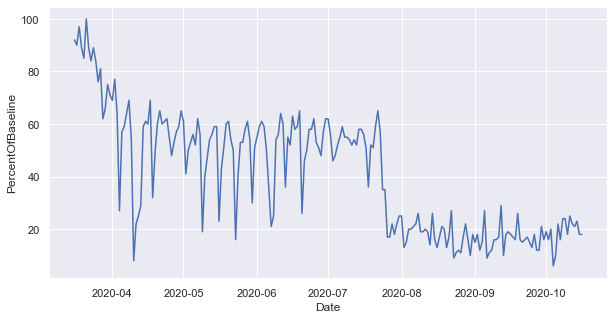

In [61]:
sns.set(rc={'figure.figsize':(10,5)}) # aumentando os eixos
sns.lineplot(x="Date", y='PercentOfBaseline', data = df.loc[df.Country.isin(["Australia"])])

É perceptível que tem bastante variação, mas também que a tendência é diminuir. 
A mesma visualização, mas para os outros países:

<AxesSubplot:xlabel='Date', ylabel='PercentOfBaseline'>

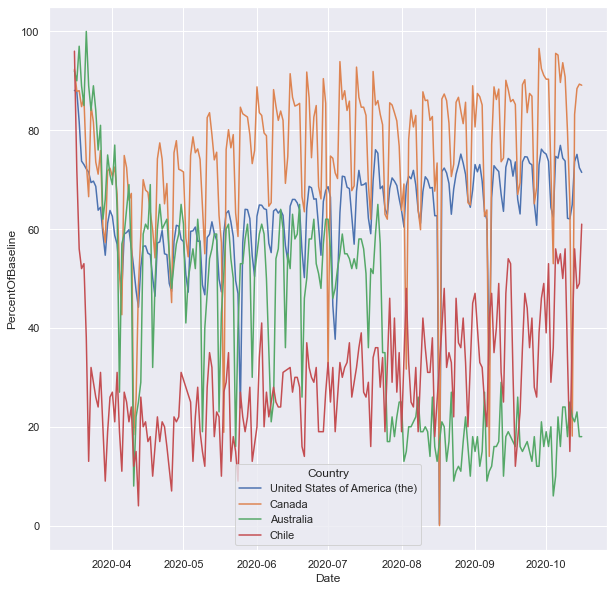

In [65]:
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x="Date", y='PercentOfBaseline',hue="Country", data = df,ci=None)

Apesar de um pouco confuso, concluimos que todos tem bastante variação, mas seguem uma tendência distinta. 

OBS: Os dados "PercentOfBaseline" mostram dados percentuais, portanto, podemos comparar todos os aeroportos de forma equivalente.

### Visualizar as tendências

Para visualizar essa tendência de cada um dos países, o próximo grafico mostra mudança do percentual de voos, por MÊS, em cada país, pela média dos dados:

<AxesSubplot:xlabel='Date', ylabel='PercentOfBaseline'>

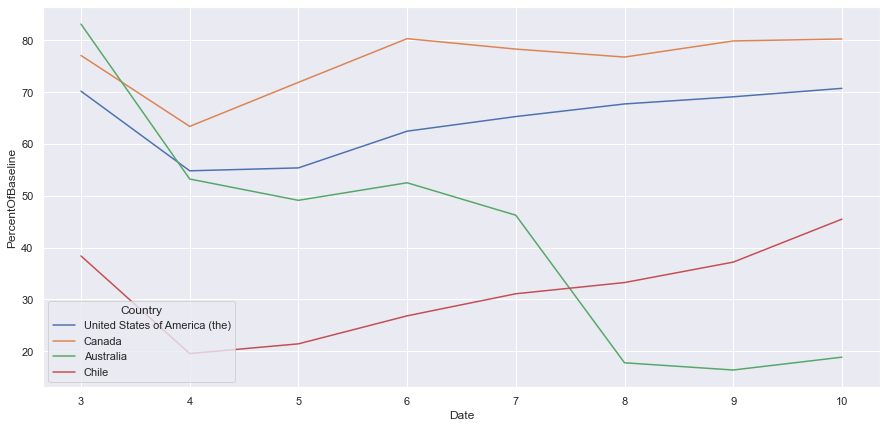

In [95]:
sns.set(rc={'figure.figsize':(15,7)})
#sns.lineplot(x=month, y='PercentOfBaseline', hue = 'Country', data = df, ci=None,estimator="sum")
sns.lineplot(x=month, y='PercentOfBaseline', hue = 'Country', data = df, ci=None,estimator="mean")

As médias fazem mais sentido (que as somas comentadas) uma vez que:
1. São porcentagens
2. Alguns países possuem mais dados que outros (Australia só tem registro de um aeroporto e USA vários)

Visualizar a mudança do percentual de voos, por DIA, em cada país (somas):

<AxesSubplot:xlabel='Date', ylabel='PercentOfBaseline'>

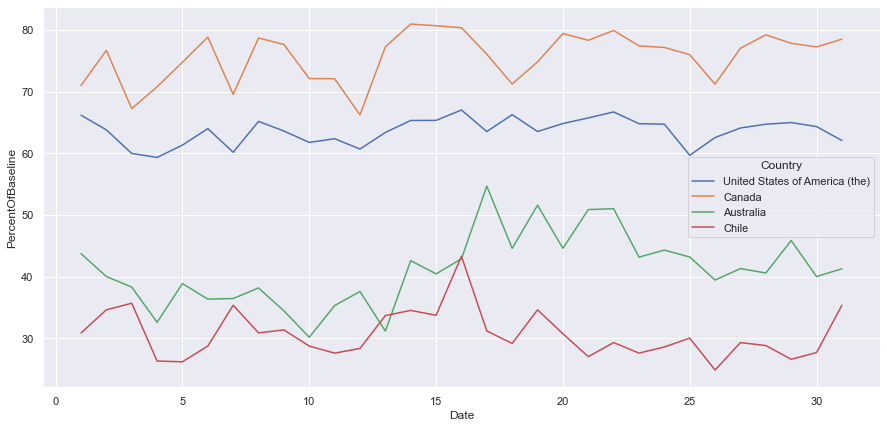

In [96]:
#sns.lineplot(x=day, y='PercentOfBaseline', hue = 'Country', data = df, ci=None,estimator="sum")
sns.lineplot(x=day, y='PercentOfBaseline', hue = 'Country', data = df, ci=None,estimator="mean")

OBS: agrupa mesmo dia de cada mês (ou seja, não é uma linha do tempo, mas permite entender os dados, uma vez que, talvez, mesmo em tempos de covid, possamos traçar o fluxo de pessoas pelo período do mês, o que não parece ser o caso, mas vale investigar mais a fundo)

Usando a média dos percentuais, podemos observar que Australia e Chile tiveram o percentual da sua baseline menor que USA e Austrália. Seria interessante comparar esse fato com uma base que mostrasse a evolução do covid nesses locais. (Além de os dados completos)

## Diferenças no mesmo país: comparação de aeroportos

Já que a comparação entre países pode não ser realista, devido a falta de dados, podemos comparar os dados de um mesmo país. Essas visualizações serão feitas somente com Canada e USA, já que são os únicos que tem dados de mais de um aeroporto.


<AxesSubplot:xlabel='Date', ylabel='PercentOfBaseline'>

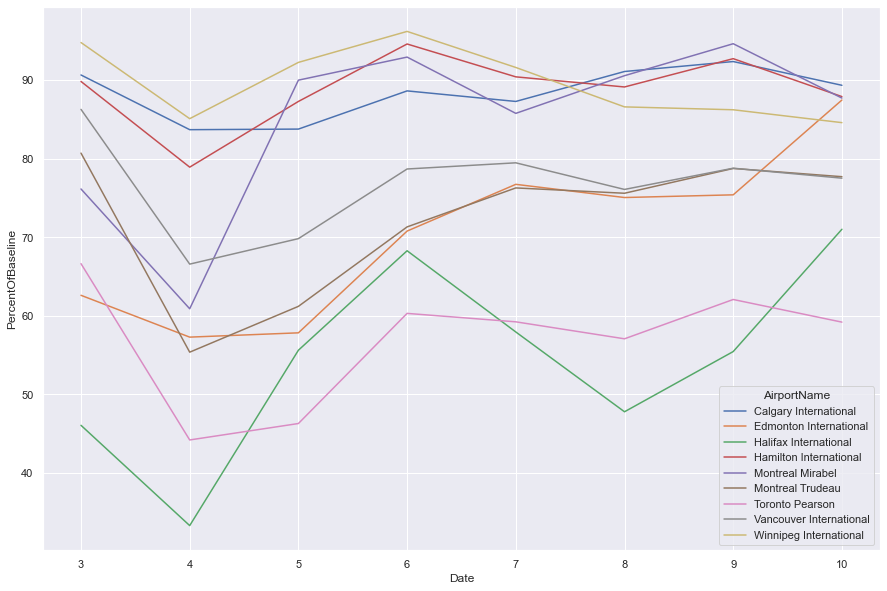

In [99]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x=month, y='PercentOfBaseline',hue="AirportName", data= df.loc[df.Country.isin(["Canada"])],ci=None)

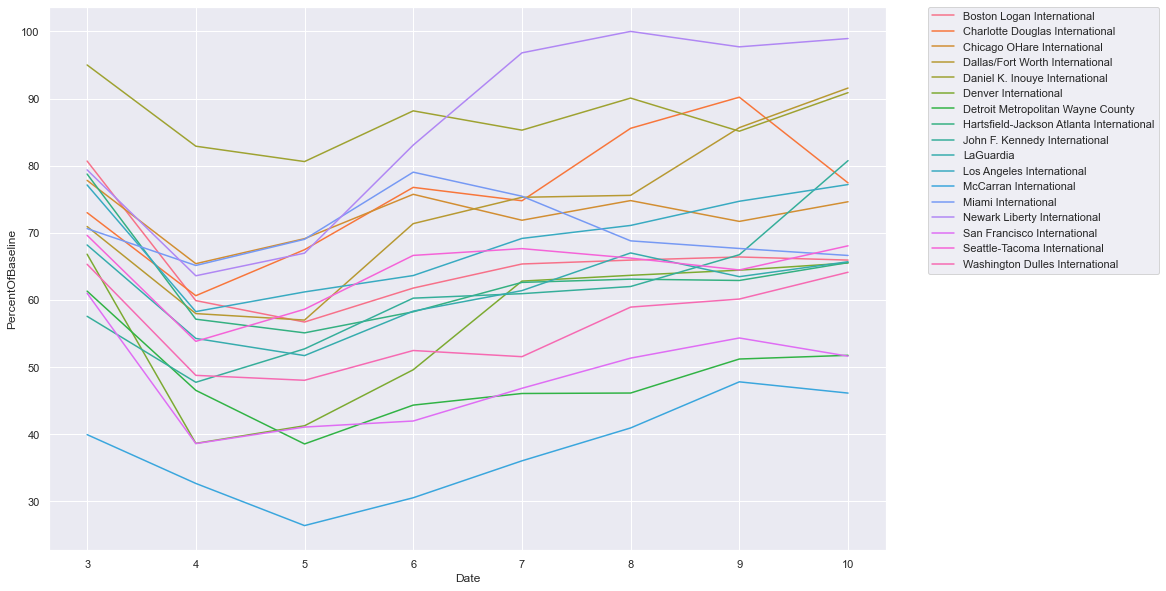

In [101]:
sns.lineplot(x=month, y='PercentOfBaseline',hue="AirportName", data= df.loc[df.Country.isin(["United States of America (the)"])],ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Inicialmente só temos gráficos de linha, pois as únicas variáveis a serem observadas são tempo e porcentagem de linha de base, diferenciando os dados exibidos. Não há outra variável para comparar distribuição, como os dados são diários o histograma não funciona (utiliza contagem) e os gráficos de barra não tem sentido também.

Conclusão inicial: Devemos analisar cada país individualmente para fazer modelos e a partir disso, podemos criar alguns interessantes, por exemplo, estimar a data da viagem ou qual aeroporto utilizado.